In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

First we visualize the data table.

In [3]:
df = pd.read_csv("Line_Transect.csv")
df

,Quadrats,Light Intensity (lux),Soil Moisture (score),pH,Ambient Temperature (°C),Axonopus compressus Density,Ottochloa nodosa Density,Synedrella nodiflora Density
0,1,16100,1,7.0,35.6,0.37,0.15,0.02
1,2,21590,1,7.0,37.1,0.42,0.26,0.06
2,3,14210,1,7.0,37.1,0.00,0.47,0.25
3,4,16900,9,7.0,36.9,0.39,0.24,0.24
4,5,14370,7,7.0,36.5,0.93,0.02,0.09
5,6,11360,8,7.0,35.9,0.96,0.03,0.05
6,7,16220,8,6.5,35.6,0.97,0.02,0.00
7,8,42730,5,7.0,35.5,0.91,0.05,0.03
8,9,25200,8,6.5,35.8,1.00,0.00,0.00
9,10,29250,6,7.0,35.9,0.94,0.04,0.03


Then we plot a scatter matrix to visually check if there is any interesting correlations between the variables.

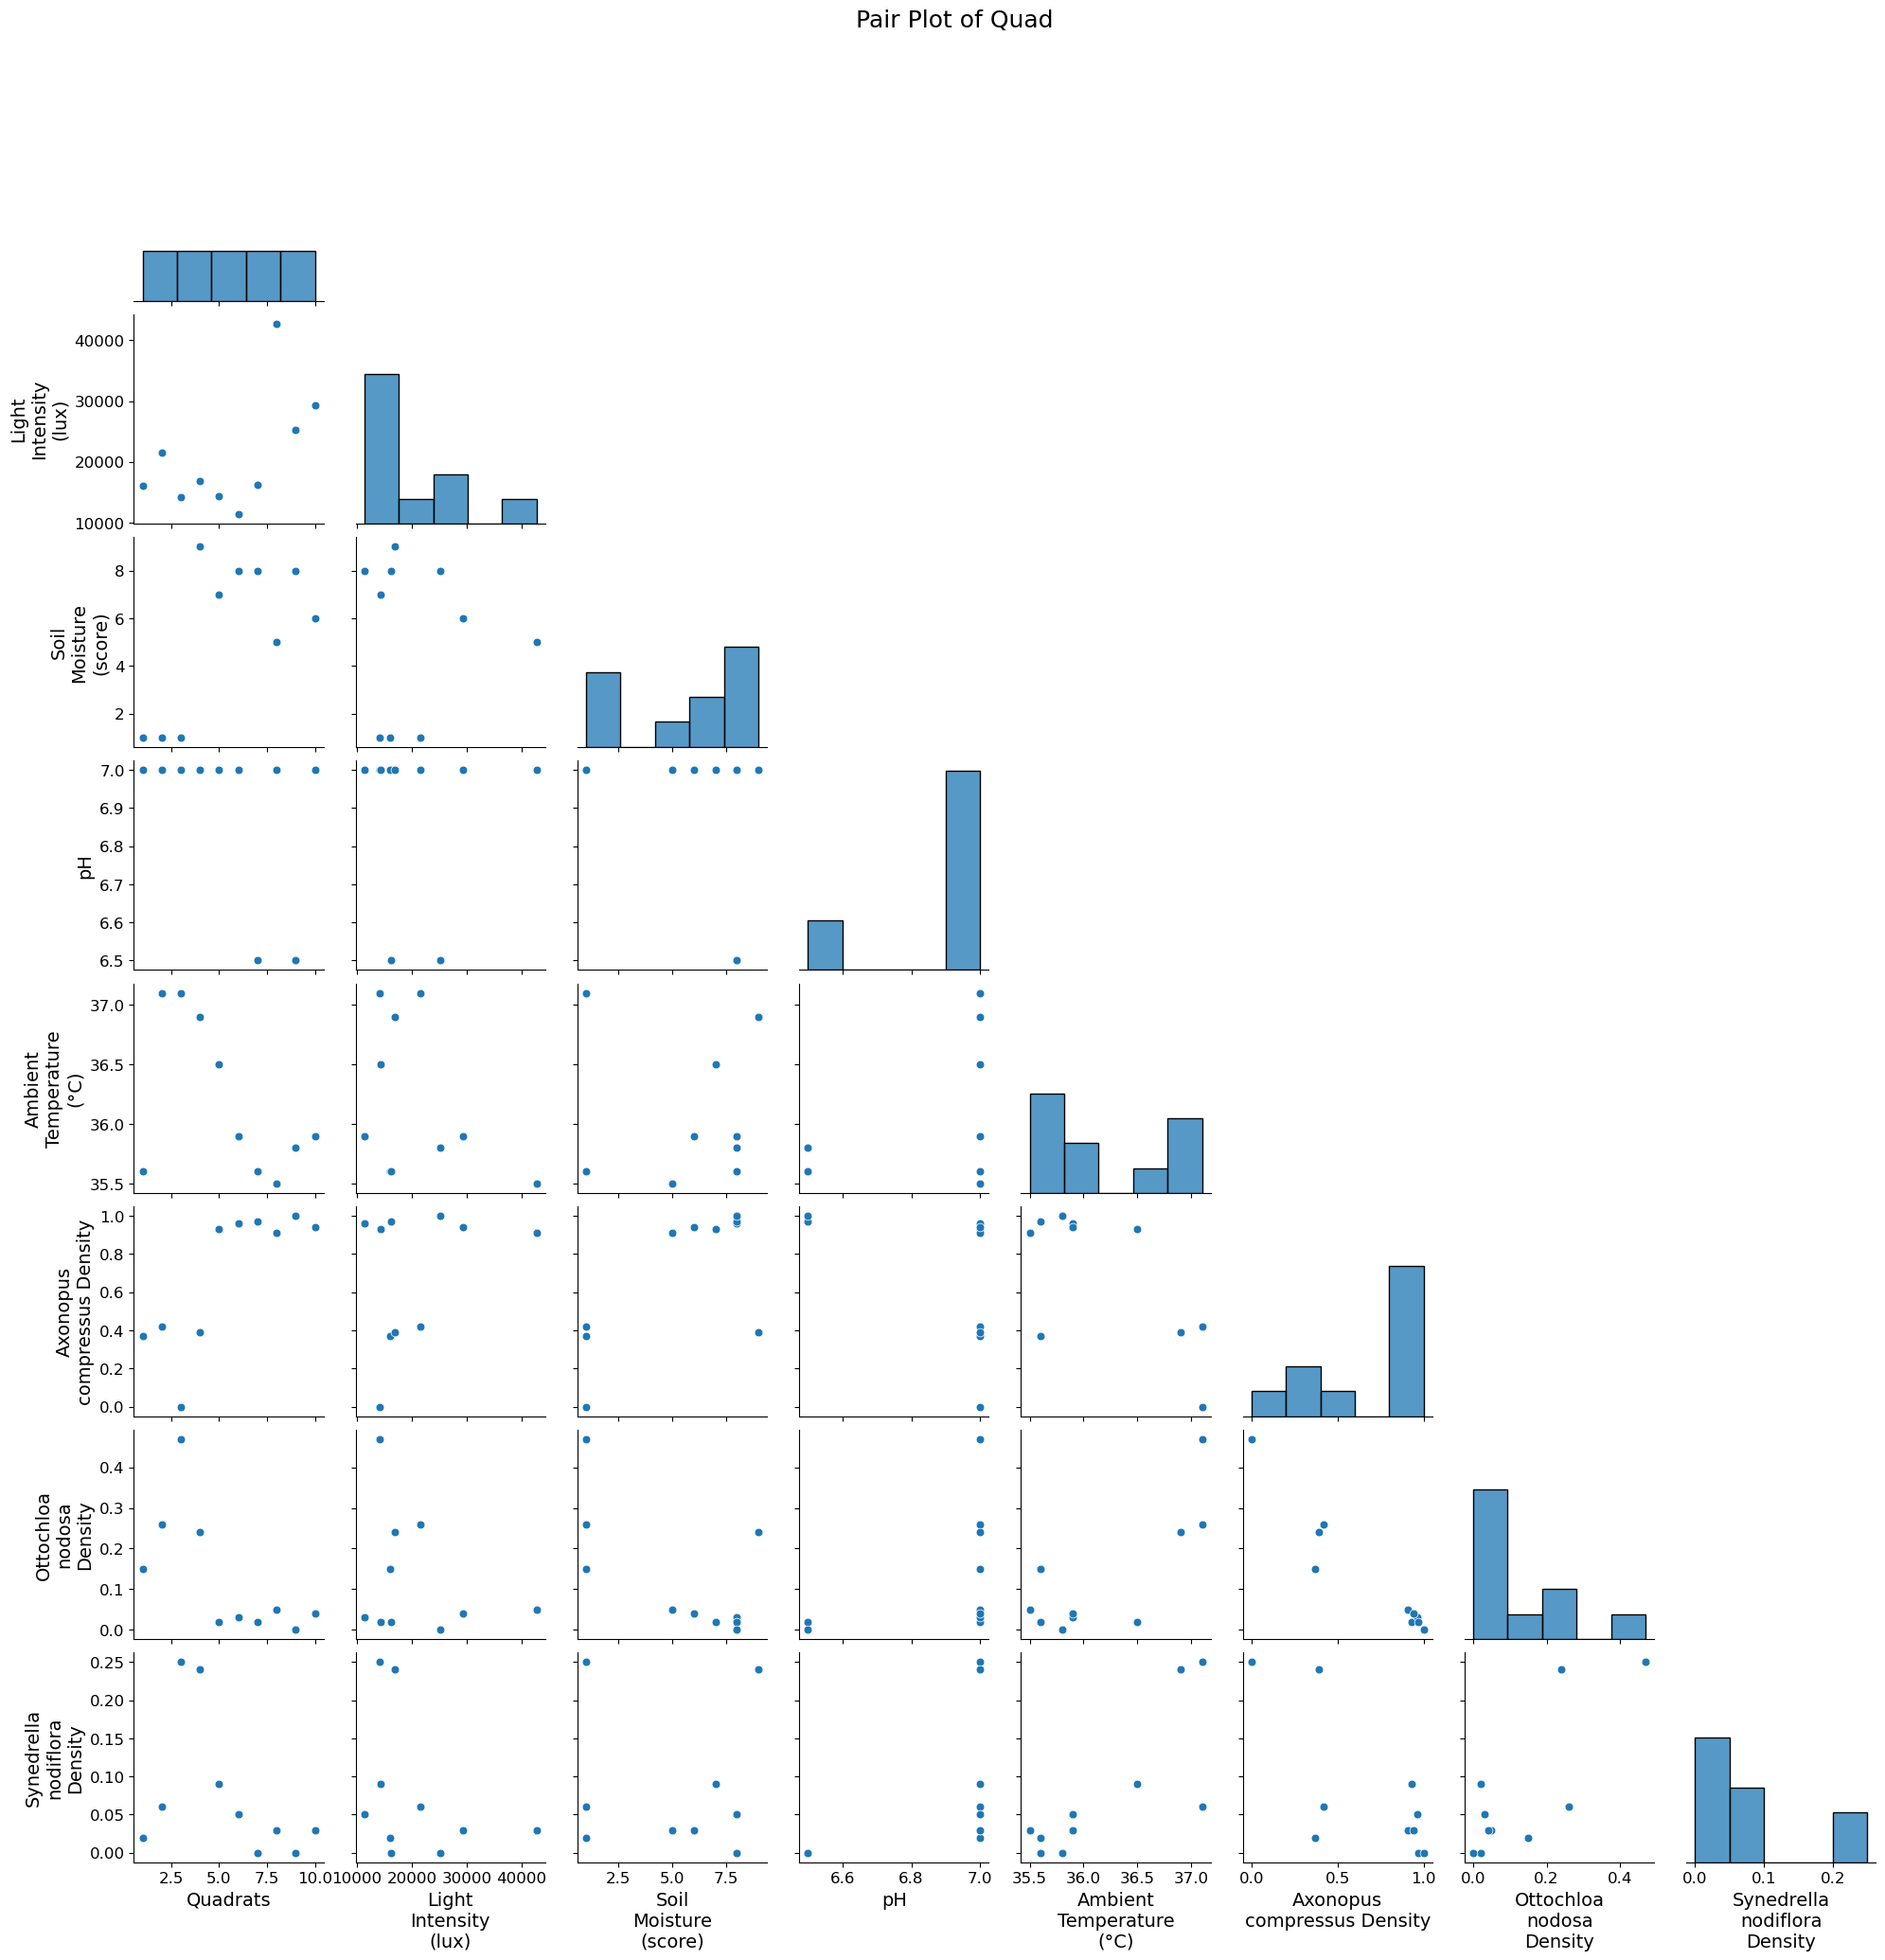

In [43]:
# Replace column names with wrapped versions
df.columns = [col.replace(" ", """\n""") for col in df.columns]  # or use .replace("SomeLongLabel", "Some\nLong\nLabel")

# Create pairplot with larger dots
g = sns.pairplot(df, diag_kind="hist", corner=True, plot_kws={'s': 40})  # 's' sets marker size

# Make tick and axis label fonts bigger
for ax in g.axes.flatten():
    if ax:
        ax.set_xlabel(ax.get_xlabel(), fontsize=14)
        ax.set_ylabel(ax.get_ylabel(), fontsize=14)
        ax.tick_params(axis='both', labelsize=12)

plt.suptitle("Pair Plot of Quad", fontsize=18, y=1.03)
plt.show()

We can first compute the summary statistics for an initial insight.

In [41]:
summary = df.describe().T
summary['skew'] = df.skew()
summary = summary.round(2)
summary

,count,mean,std,min,25%,50%,75%,max,skew
Quadrats,10.0,5.50,3.03,1.0,3.25,5.50,7.75,10.00,0.00
Light\nIntensity\n(lux),10.0,20793.00,9454.42,11360.0,14802.50,16560.00,24297.50,42730.00,1.58
Soil\nMoisture\n(score),10.0,5.40,3.24,1.0,2.00,6.50,8.00,9.00,-0.62
pH,10.0,6.90,0.21,6.5,7.00,7.00,7.00,7.00,-1.78
Ambient\nTemperature\n(°C),10.0,36.19,0.65,35.5,35.65,35.90,36.80,37.10,0.54
Axonopus\ncompressus Density,10.0,0.69,0.36,0.0,0.40,0.92,0.96,1.00,-0.88
Ottochloa\nnodosa\nDensity,10.0,0.13,0.15,0.0,0.02,0.04,0.22,0.47,1.44
Synedrella\nnodiflora\nDensity,10.0,0.08,0.09,0.0,0.02,0.04,0.08,0.25,1.43


To statistically check for any monotonic correlation, we can perform a Spearman correlation matrix.

In [47]:
corr_matrix = df.corr(method="spearman").round(2)

# Keep only lower triangle + diagonal
corr_lower_with_diag = corr_matrix.where(
    np.tril(np.ones(corr_matrix.shape), k=0).astype(bool)
)

# Optional: Replace NaNs with empty strings for display
corr_lower_with_diag = corr_lower_with_diag.fillna("")

corr_lower_with_diag

# df.corr(method="spearman").round(2)

,Quadrats,Light\nIntensity\n(lux),Soil\nMoisture\n(score),pH,Ambient\nTemperature\n(°C),Axonopus\ncompressus Density,Ottochloa\nnodosa\nDensity,Synedrella\nnodiflora\nDensity
Quadrats,1.00,,,,,,,
Light\nIntensity\n(lux),0.53,1.0,,,,,,
Soil\nMoisture\n(score),0.47,-0.02,1.0,,,,,
pH,-0.44,-0.17,-0.45,1.0,,,,
Ambient\nTemperature\n(°C),-0.44,-0.35,-0.13,0.4,1.0,,,
Axonopus\ncompressus Density,0.77,0.21,0.6,-0.7,-0.42,1.0,,
Ottochloa\nnodosa\nDensity,-0.66,-0.08,-0.58,0.65,0.52,-0.9,1.0,
Synedrella\nnodiflora\nDensity,-0.47,-0.4,-0.15,0.7,0.82,-0.65,0.64,1.0


A p-value matrix on the Spearman correlation can also be calculated.

In [45]:
# Create empty matrices
pval_matrix = pd.DataFrame(np.ones((df.shape[1], df.shape[1])), 
                           columns=df.columns, index=df.columns)
corr_matrix = pd.DataFrame(np.zeros((df.shape[1], df.shape[1])),
                           columns=df.columns, index=df.columns)

# Compute Spearman correlation and p-values
for i in range(len(df.columns)):
    for j in range(i, len(df.columns)):
        col1 = df.columns[i]
        col2 = df.columns[j]
        valid_data = df[[col1, col2]].dropna()
        if valid_data.shape[0] > 1:
            result = spearmanr(valid_data[col1], valid_data[col2])
            # Handle output type (scalar or matrix)
            if isinstance(result.correlation, np.ndarray):
                rho = result.correlation[0, 1]
                pval = result.pvalue[0, 1]
            else:
                rho = result.correlation
                pval = result.pvalue
        else:
            rho = pval = np.nan

        corr_matrix.loc[col1, col2] = rho
        corr_matrix.loc[col2, col1] = rho
        pval_matrix.loc[col1, col2] = pval
        pval_matrix.loc[col2, col1] = pval

# Format p-values as string: "< 0.05" or rounded to 2 decimal places
pval_matrix_formatted = pval_matrix.map(
    lambda x: "(<0.05)" if pd.notnull(x) and x < 0.05 else 
              (f"{x:.2f}" if pd.notnull(x) else "")
)

pval_matrix_formatted

pval_lower_only = pval_matrix_formatted.where(
    np.tril(np.ones(pval_matrix_formatted.shape), k=-1).astype(bool)
)
pval_lower_only = pval_lower_only.fillna("")
pval_lower_only

,Quadrats,Light\nIntensity\n(lux),Soil\nMoisture\n(score),pH,Ambient\nTemperature\n(°C),Axonopus\ncompressus Density,Ottochloa\nnodosa\nDensity,Synedrella\nnodiflora\nDensity
Quadrats,,,,,,,,
Light\nIntensity\n(lux),0.12,,,,,,,
Soil\nMoisture\n(score),0.17,0.96,,,,,,
pH,0.21,0.63,0.20,,,,,
Ambient\nTemperature\n(°C),0.20,0.32,0.73,0.26,,,,
Axonopus\ncompressus Density,(<0.05),0.56,0.07,(<0.05),0.23,,,
Ottochloa\nnodosa\nDensity,(<0.05),0.83,0.08,(<0.05),0.12,(<0.05),,
Synedrella\nnodiflora\nDensity,0.17,0.26,0.68,(<0.05),(<0.05),(<0.05),(<0.05),
